In [1]:
from job_generator import Synthetic_Job_Generator
from cluster import Cluster
from job import Job 
from gpu import GPU
import pickle 
import numpy as np
import utilities as utils
import matplotlib.pyplot as plt

In [11]:
def display_stats(cluster): 
    gpu_utilization = utils.get_all_gpu_utilization(cluster)
    print(f'Time taken:\t\t{len(cluster.gpu_array[-1].job_history)}')
    print(f'Mean GPU Utilization:\t{round(np.mean(gpu_utilization),3)}')
    print(f'STD GPU Utilization:\t{round(np.std(gpu_utilization),3)}')
    print(f'Mean Fairness Ratio:\t{round(np.mean(utils.get_fairness_ratios(cluster)),3)}')
    
    avg_util_by_time = utils.get_utilization_by_time(cluster)
    plt.plot(range(len(avg_util_by_time)), avg_util_by_time)
    plt.xlabel('Time')
    plt.ylabel('GPU Utilization')
    plt.title('GPU Utilization Over Time')
    plt.show()
    
    plt.plot(range(len(avg_util_by_time)), cluster.wait_hist)
    plt.xlabel('Time')
    plt.ylabel('# Waiting Jobs')
    plt.title('Waiting Jobs Over Time')
    plt.show()
    
    plt.plot(range(len(avg_util_by_time)), cluster.curr_hist)
    plt.xlabel('Time')
    plt.ylabel('# Current Jobs')
    plt.title('Executing Jobs Over Time')
    plt.show()
    
    plt.plot(range(len(avg_util_by_time)), cluster.finish_hist)
    plt.xlabel('Time')
    plt.ylabel('# Finished Jobs')
    plt.title('Finished Jobs Over Time')
    plt.show()

Time taken:		1463
Mean GPU Utilization:	0.63
STD GPU Utilization:	0.342
Mean Fairness Ratio:	1.627


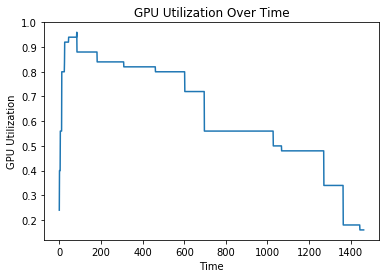

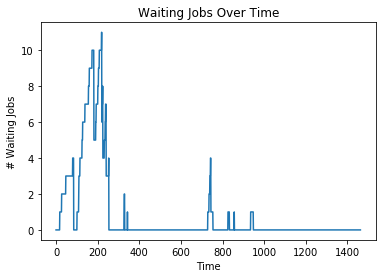

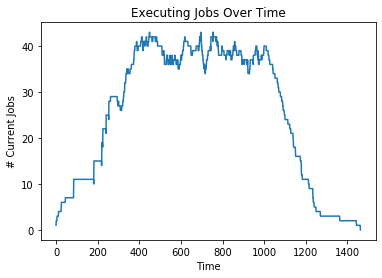

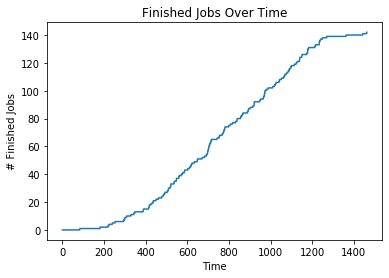

In [14]:
cluster1 = pickle.load(open('data/test-1.pkl', 'rb'))
display_stats(cluster1)

In [5]:
print('\n'.join(str(x) for x in cluster1.finished_jobs))